## Importing Data and Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import  XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('data/stud.csv')
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [7]:
df.shape

(1000, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### We will work on predicting Math score which will be y variable, and the rest of columns will be X features

In [9]:
X = df.drop('math_score', axis=1)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [10]:
y = df['math_score']
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

### Split the data into train and text 

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)   

### Create column transformer pipeline for numarical and categorical data

In [45]:
def num_cat_columns_transformer(train_data, test_data, status= 'train'):
    '''
    This fucntion transform the numarical and categorical columns using pipeline
    train_data: add x_train
    text_data: add x_test
    status: if you want to fit and transform training data then trpe 'train which is the defult option
            if you want to transform the test data then type 'test 
    '''
    num_column = train_data.select_dtypes(exclude='object').columns
    cat_column = train_data.select_dtypes(include='object').columns

    num_transformer = StandardScaler()
    cat_transformer = OneHotEncoder()

    preprocessor = ColumnTransformer(
        [
            ("OneHotEncoder", cat_transformer, cat_column, ),
            ("StandardScaler", num_transformer, num_column)
        ]
    )

    data_preprocessed =""
    
    if status == 'train':
        data_preprocessed = preprocessor.fit_transform(train_data)

    elif status == 'test':
        train_preprocessed = preprocessor.fit_transform(train_data)
        data_preprocessed = preprocessor.transform(test_data)
    return data_preprocessed

In [46]:
# no need for that now, maybe delete it later

x_columns = x_train.columns
print(x_columns)

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'reading_score', 'writing_score'],
      dtype='object')


In [47]:
x_train_preprocessed = num_cat_columns_transformer(x_train, x_test, 'train')

In [48]:
x_train_preprocessed.shape #type:ignore

(800, 19)

In [49]:
x_test_preprocessed = num_cat_columns_transformer(x_train, x_test, 'test')

In [50]:
x_test_preprocessed.shape #type:ignore

(200, 19)

### Create Evaluete_Model function to evaluate the all models after training

In [18]:
def evaluate_model(y, y_pred):
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rsme = np.sqrt(mean_squared_error(y, y_pred))
    r2_square = r2_score(y, y_pred)
    return mae, rsme, r2_square

### Run the model and check which has the best score

In [52]:
# Create dict include all models
models ={

    "l_reg": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge":Ridge(),
    "K_Neighbors": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGB": XGBRegressor(),
    "CatBoost": CatBoostRegressor(),
    "AdaBoost":AdaBoostRegressor()
}

In [53]:
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train_preprocessed,y_train) # train model

    y_pred = model.predict(x_test_preprocessed) # make prediction

    model_mae, model_rsme, model_r2 = evaluate_model(y_test, y_pred) # evlaute the model

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    r2_list.append(model_r2)

    print('Model Performance:')
    print("- Root mean squared error = {:.3f}".format(model_rsme))
    print("- Mean abslote error = {:.3f}".format(model_mae))
    print("- R2 Score = {:.3f}".format(model_r2))
    print("="*30,"\n")






l_reg
Model Performance:
- Root mean squared error = 5.397
- Mean abslote error = 4.217
- R2 Score = 0.880

Lasso
Model Performance:
- Root mean squared error = 6.517
- Mean abslote error = 5.156
- R2 Score = 0.825

Ridge
Model Performance:
- Root mean squared error = 5.390
- Mean abslote error = 4.211
- R2 Score = 0.881

K_Neighbors
Model Performance:
- Root mean squared error = 7.217
- Mean abslote error = 5.588
- R2 Score = 0.786

Decision Tree
Model Performance:
- Root mean squared error = 7.992
- Mean abslote error = 6.315
- R2 Score = 0.738

Random Forest
Model Performance:
- Root mean squared error = 5.933
- Mean abslote error = 4.579
- R2 Score = 0.855

XGB
Model Performance:
- Root mean squared error = 6.473
- Mean abslote error = 5.058
- R2 Score = 0.828

Learning rate set to 0.039525
0:	learn: 14.5987177	total: 1.25ms	remaining: 1.25s
1:	learn: 14.2251886	total: 2.32ms	remaining: 1.16s
2:	learn: 13.8866124	total: 3.61ms	remaining: 1.2s
3:	learn: 13.5235688	total: 4.9ms	remai

In [54]:
models_df = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by='R2_Score', ascending=False)
models_df

,Model Name,R2_Score
2,Ridge,0.880592
0,l_reg,0.880315
5,Random Forest,0.855343
7,CatBoost,0.851831
8,AdaBoost,0.849182
6,XGB,0.827797
1,Lasso,0.825446
3,K_Neighbors,0.785944
4,Decision Tree,0.737547


### Let's fine tune Ridge model

In [55]:
model_ridge = Ridge(alpha=10, fit_intercept=False, solver='lsqr', random_state=42)
trained = model_ridge.fit(x_train_preprocessed, y_train) #type: ignore
y_predict = model_ridge.predict(x_test_preprocessed) #type: ignore
score = r2_score(y_test, y_predict)
print(score)

0.8825730217047008


### Plot y_test and y_pred

<Axes: xlabel='math_score'>

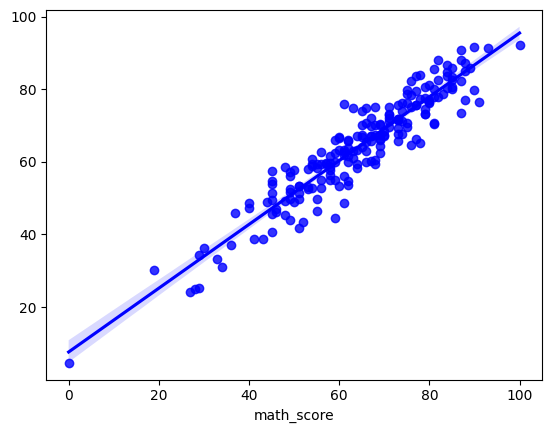

In [56]:
sns.regplot(x=y_test, y=y_predict, color="blue")

### Feature Engineering: Drop one cateogory in OneHotEndcoder for binary features and check the result

In [67]:
def num_cat_columns_transformer_one_hot(train_data, test_data, status= 'train'):
    
    '''
    This fucntion transform the numarical and categorical columns using pipeline, OneHotEncoder drops one of 2 categories in case it's bianry
    train_data: add x_train
    text_data: add x_test
    status: if you want to fit and transform training data then trpe 'train which is the defult option
            if you want to transform the test data then type 'test 
    '''


    num_column = train_data.select_dtypes(exclude='object').columns
    cat_column = train_data.select_dtypes(include='object').columns

    num_transformer = StandardScaler()
    cat_transformer = OneHotEncoder(drop='if_binary')

    preprocessor = ColumnTransformer(
        [
            ("OneHotEncoder", cat_transformer, cat_column, ),
            ("StandardScaler", num_transformer, num_column)
        ]
    )

    data_preprocessed =""
    
    if status == 'train':
        data_preprocessed = preprocessor.fit_transform(train_data)

    elif status == 'test':
        train_preprocessed = preprocessor.fit_transform(train_data)
        data_preprocessed = preprocessor.transform(test_data)
    return data_preprocessed

In [68]:
x_train_preprocessed_2 = num_cat_columns_transformer_one_hot(x_train, x_test, 'train')
x_train_preprocessed_2.shape

(800, 16)

In [69]:
x_test_preprocessed_2 = num_cat_columns_transformer_one_hot(x_train, x_test, 'test')
x_test_preprocessed_2.shape

(200, 16)

### Evluate models

In [70]:
model_list2 = []
r2_list2 =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train_preprocessed_2,y_train) # train model

    y_pred = model.predict(x_test_preprocessed_2) # make prediction

    model_mae, model_rsme, model_r2 = evaluate_model(y_test, y_pred) # evlaute the model

    print(list(models.keys())[i])
    model_list2.append(list(models.keys())[i])
    r2_list2.append(model_r2)

    print('Model Performance:')
    print("- Root mean squared error = {:.3f}".format(model_rsme))
    print("- Mean abslote error = {:.3f}".format(model_mae))
    print("- R2 Score = {:.3f}".format(model_r2))
    print("="*30,"\n")






l_reg
Model Performance:
- Root mean squared error = 5.391
- Mean abslote error = 4.213
- R2 Score = 0.881

Lasso
Model Performance:
- Root mean squared error = 6.517
- Mean abslote error = 5.156
- R2 Score = 0.825

Ridge
Model Performance:
- Root mean squared error = 5.392
- Mean abslote error = 4.211
- R2 Score = 0.881

K_Neighbors
Model Performance:
- Root mean squared error = 7.705
- Mean abslote error = 5.983
- R2 Score = 0.756

Decision Tree
Model Performance:
- Root mean squared error = 8.114
- Mean abslote error = 6.375
- R2 Score = 0.729

Random Forest
Model Performance:
- Root mean squared error = 5.992
- Mean abslote error = 4.658
- R2 Score = 0.852

XGB
Model Performance:
- Root mean squared error = 6.473
- Mean abslote error = 5.058
- R2 Score = 0.828

Learning rate set to 0.039525
0:	learn: 14.6184027	total: 1.23ms	remaining: 1.23s
1:	learn: 14.2492331	total: 2.37ms	remaining: 1.18s
2:	learn: 13.9018209	total: 3.67ms	remaining: 1.22s
3:	learn: 13.5696575	total: 4.7ms	rema

In [71]:
models_df2 = pd.DataFrame(list(zip(model_list2, r2_list2)), columns=['Model Name', 'R2_Score']).sort_values(by='R2_Score', ascending=False)
models_df2

,Model Name,R2_Score
0,l_reg,0.880574
2,Ridge,0.880533
5,Random Forest,0.852455
7,CatBoost,0.850426
8,AdaBoost,0.847778
6,XGB,0.827797
1,Lasso,0.825446
3,K_Neighbors,0.756054
4,Decision Tree,0.729451


## Still Ridge has the best score in respect to no removing any category in OneHotEncoding